In [1]:
# Copyright © Advanced Micro Devices, Inc., or its affiliates.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Supporting Aperio SVS Format (since v21.10.01)

As of **v21.10.01**, **cuCIM** supports Aperio SVS Format(.svs).

## Install prerequisites

In [2]:
!pip install wget matplotlib

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9687 sha256=01f1a3fa50851cd049613bc15382cebf5ce03f1365ccea415bcb38f9009b5e03
  Stored in directory: /home/pchokse/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Download Datasets

We can download sample SVS files from [OpenSlide Test Data](https://openslide.cs.cmu.edu/download/openslide-testdata/index.html) which is available under [CC0-1.0](https://creativecommons.org/publicdomain/zero/1.0/) LICENSE.

In [3]:
DATA_PATH_LIST = []

import json
import wget
from pathlib import Path

data_url = "https://openslide.cs.cmu.edu/download/openslide-testdata"
if not Path("index.json").exists():
    wget.download(f"{data_url}/index.json")

with open("index.json") as fp:
    data_index = json.load(fp)

Path("Aperio").mkdir(parents=True, exist_ok=True)
for file_path in data_index:    
    if file_path.startswith("Aperio/"):
        DATA_PATH_LIST.append(file_path)
        if not Path(file_path).exists():
            file_info = data_index[file_path]
            print(f"# Downloading {file_path} ({file_info['description']}) ...")
            wget.download(f"{data_url}/{file_path}", out=file_path)
            print()

## Accessing Metadata

Aperio SVS-specific metadata is available at `aperio` of `metadata` field of the `CuImage` object.

In [4]:
from cucim import CuImage
import pprint

pp = pprint.PrettyPrinter(indent=2, compact=True)

for file_name in DATA_PATH_LIST:
    img = CuImage(file_name)
    print("#", file_name)
    metadata = img.metadata
    pp.pprint(img.metadata)


# Aperio/CMU-1-JP2K-33005.svs
{ 'aperio': { 'AppMag': '20',
              'Date': '12/29/09',
              'Filename': 'CMU-1',
              'Filtered': '5',
              'Focus Offset': '0.000000',
              'Header': 'Aperio Image Library v11.2.1 \r\n'
                        '46000x32914 [0,0 46000x32893] (240x240) J2K/KDU '
                        'Q=30;CMU-1;Aperio Image Library v10.0.51\r\n'
                        '46920x33014 [0,100 46000x32914] (256x256) JPEG/RGB '
                        'Q=30',
              'ImageID': '1004486',
              'Left': '25.691574',
              'LineAreaXOffset': '0.019265',
              'LineAreaYOffset': '-0.000313',
              'LineCameraSkew': '-0.000424',
              'MPP': '0.4990',
              'OriginalHeight': '32914',
              'OriginalWidth': '46920',
              'Originalheight': '33014',
              'Parmset': 'USM Filter',
              'ScanScope ID': 'CPAPERIOCS',
              'StripeWidth': '2040',
  

`associated_images` field has a set of available associated images such as 'label', 'macro', and 'thumbnail' images.

In [5]:
img.associated_images

{'label', 'macro', 'thumbnail'}

## Visualizing Sample SVS Images

/tmp/ipykernel_17501/1677916248.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(width / dpi, height / dpi))


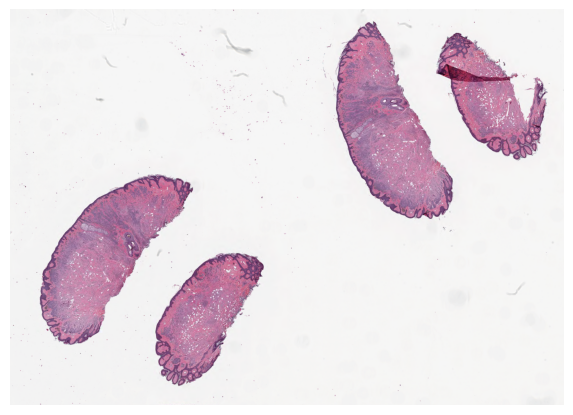

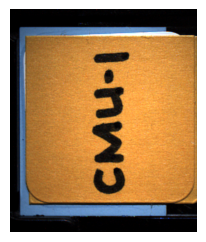

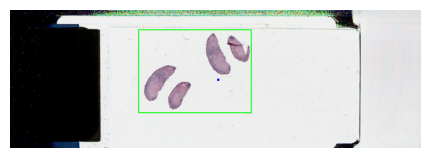

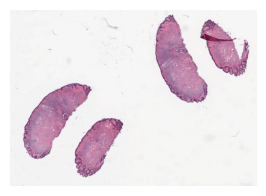

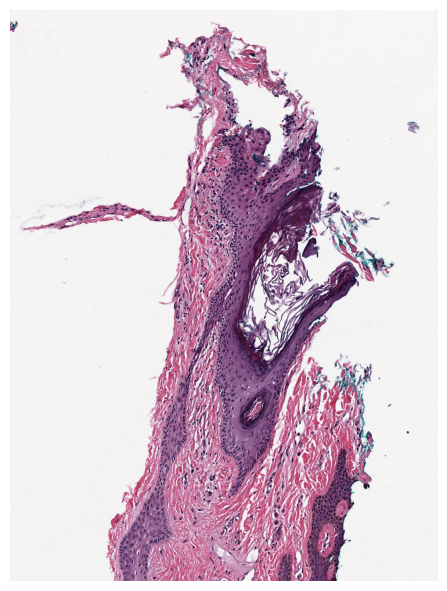

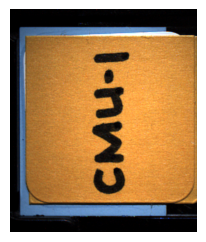

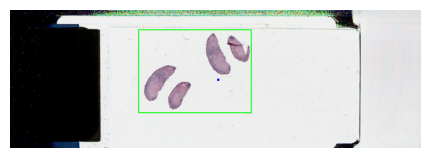

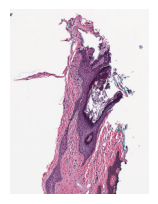

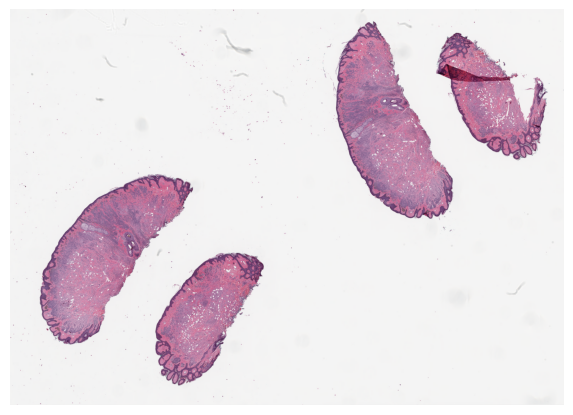

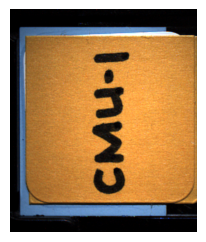

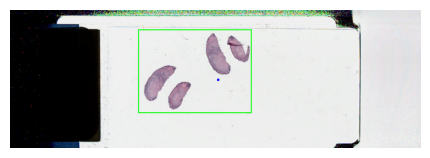

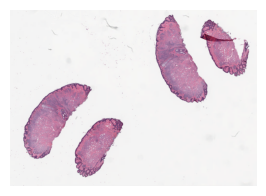

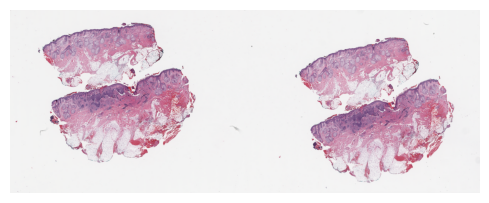

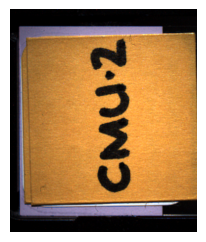

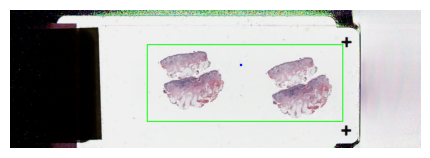

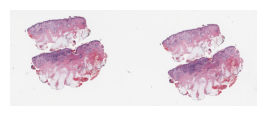

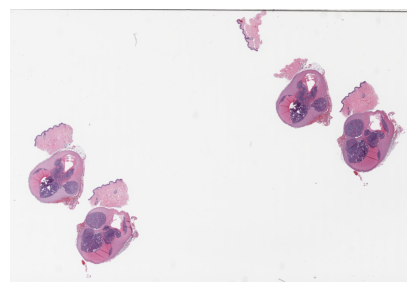

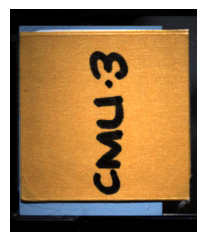

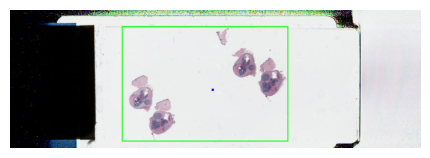

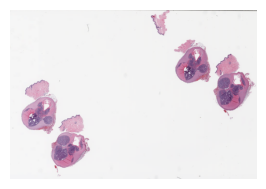

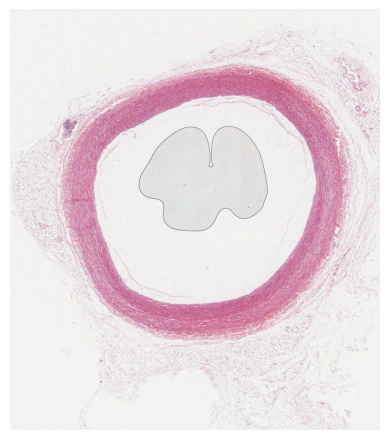

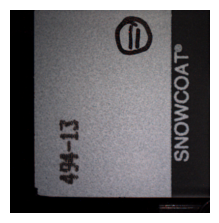

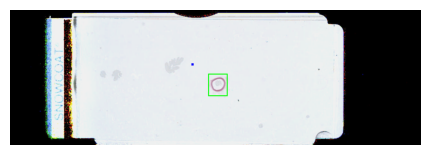

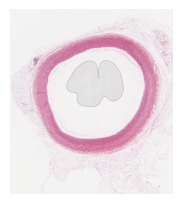

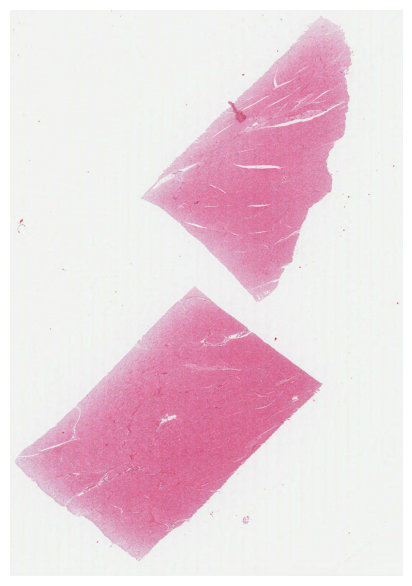

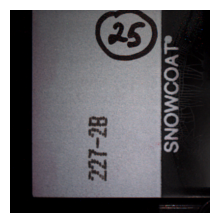

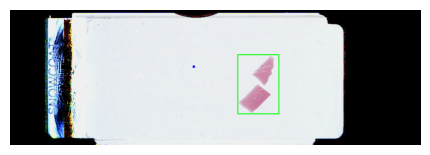

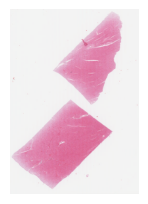

In [6]:
from matplotlib import pyplot as plt

def visualize(image, downsample=1):
    dpi = 80.0 * downsample
    height, width, _ = image.shape
    plt.figure(figsize=(width / dpi, height / dpi))
    plt.axis('off')
    plt.imshow(image)
plt.close('all')
   
import numpy as np
from cucim import CuImage

for file_name in DATA_PATH_LIST:
    img = CuImage(file_name)
    metadata = img.metadata
    level_count = metadata["cucim"]["resolutions"]["level_count"]
    small_img = img.read_region(level=level_count - 1) # read whole image at the lowest resolution level
    label_img = img.associated_image("label")
    macro_img = img.associated_image("macro")
    thumbnail_img = img.associated_image("thumbnail")
    visualize(np.asarray(small_img), 5)
    visualize(np.asarray(label_img), 2)
    visualize(np.asarray(macro_img), 3)
    visualize(np.asarray(thumbnail_img), 4)
